# Análisis factorial exploratorio

El análisis factorial es una técnica de reducción de dimensiones. Esto es, se busca “reducir” una gran cantidad de variables a un conjunto más pequeño de factores o componentes. Esta técnica se utiliza para comprender la estructura subyacente de un conjunto de variables, construir una escala que mida una variable no observable (variable latente), o reducir un conjunto de variables a un tamaño más manejable.


El análisis factorial puede ser exploratorio o confirmatorio. El análisis factorial exploratorio se utiliza comúnmente en etapas iniciales de la investigación para analizar la interrelación entre las variables. El análisis factorial confirmatorio es una técnica en la que se busca confirmar hipótesis específicas acerca de la estructura subyacente en un conjunto de variables. 

In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
# Instalar solamente una vez:
#!pip install factor_analyzer

El archivo “Base 05 Jóvenes” contiene los resultados de una encuesta aplicada por estudiantes de una clase de estadística en la FSEV UK (Eslovaquia) en 2013. El archivo consta de las respuestas de 1010 jóvenes entre 15 y 30 años. Los temas de la encuesta son: preferencias musicales (19 ítems), preferencias por tipo de películas (12 ítems), uso de internet, hábitos de gasto (7 ítems), y datos demográficos (10 ítems). Se realizará un análisis factorial exploratorio con las variables de preferencias por películas.

In [3]:
df = pd.read_excel('data/b15_jovenes.xlsx')
df.columns

Index(['Slowsongsorfastsongs', 'Dance', 'Folk', 'Country', 'Classicalmusic',
       'Musical', 'Pop', 'Rock', 'MetalorHardrock', 'Punk', 'HiphopRap',
       'ReggaeSka', 'SwingJazz', 'Rocknroll', 'Alternative', 'Latino',
       'TechnoTrance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy',
       'Romantic', 'Scifi', 'War', 'FantasyFairytales', 'Animated',
       'Documentary', 'Western', 'Action', 'Internetusage', 'Finances',
       'Shoppingcentres', 'Brandedclothing', 'Entertainmentspending',
       'Spendingonlooks', 'Spendingongadgets', 'Spendingonhealthyeating',
       'Age', 'Height', 'Weight', 'Numberofsiblings', 'GenderD', 'Education',
       'OnlyChildD', 'CityD', 'Houseblockofflats'],
      dtype='object')

In [5]:
movies = ['Horror', 'Thriller', 'Comedy', 'Romantic', 'Scifi', 'War', 
         'FantasyFairytales', 'Animated', 'Documentary', 'Western']
df = df[movies]

## Preparación de datos

In [6]:
# Eliminar filas con valores faltantes
df = df.dropna()

In [8]:
# Estandarizar las variables
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

**Tamaño muestral**: Existen varias recomendaciones en cuanto al tamaño muestral. Tabachnick y Fidell (2001) recomiendan tener al menos 300 casos, pero aceptan que muestras más pequeñas son suficientes bajo ciertas condiciones. Nunnally (1978) recomienda tener al menos 10 observaciones por cada variable.

**Tipo de variables**: Aunque es preferible que las variables sean cuantitativas (de escala), en la práctica se pueden utilizar variables con escala de medición ordinal de cinco o más niveles. Si es así, se requiere que la distancia entre cada categoría sea igual (es decir, que los intervalos sean regulares). Se asume que las escalas tipo Likert cumplen con esta condición.

**Condiciones de aplicabilidad**: El procedimiento más común para realizar el análisis de factores se basa en el análisis de componentes principales. En el análisis de componentes principales se utilizan las correlaciones entre conjuntos de ítems (variables) para calcular los factores que los representan. Por esta razón, como condición de aplicabilidad, es deseable obtener la matriz de correlaciones y asegurarse que varios coeficientes sean mayores que 0.3. 

Sin embargo, para evaluar la conveniencia del análisis factorial, es preferible revisar la prueba de esfericidad de Bartlett y el estadístico Kaiser-Meyer-Olkin (KMO). La prueba de esfericidad de Bartlett prueba la hipótesis nula de que matriz de correlación es una matriz diagonal (todos los elementos son cero excepto la diagonal principal). Debido a que se espera que existan varias correlaciones significativas, lo deseable es rechazar la hipótesis nula (p < 0.05). 

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

print('Chi cuadrado \t', calculate_bartlett_sphericity(df)[0])
print('P valor \t', calculate_bartlett_sphericity(df)[1])

Chi cuadrado 	 1745.1725805109593
P valor 	 0.0


El estadístico KMO indica si las correlaciones entre variables pueden ser explicadas por las otras variables. Es deseable obtener valores del KMO de al menos 0.50.

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df[df.columns])
print('KMO score:',kmo_model)

KMO score: 0.6366726640440346


*Interpretación*: Se considera que el análisis factorial es adecuado dado que se obtuvo un valor mayor a 0.5 en el indicador KMO y la significancia de la prueba de esfericidad de Bartlett es menor que 0.05.

## Extracción de factores
Existen varios métodos de extracción de factores. La técnica más utilizada es la de análisis de componentes principales. Otras opciones máxima verosimilitud ('ml') o bien el método predeterminado "minres" que es más robusto ante violaciones de normalidad.

Se recomienda que si el objetivo es reducir las variables se utilice componentes principales, y si el objetivo es identificar dimensiones latentes se utilice la factorización de ejes principales. Sin embargo, aunque difieren en lo teórico, los resultados suelen ser similares por lo que generalmente se puede utilizar análisis de componentes principales.

In [13]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation='varimax', method='principal')
fa.fit(df)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

**Rotación de factores**: Existen dos opciones para la rotación de factores, ortogonal u oblicua. La rotación ortogonal lleva a una solución que es más fácil de interpretar, sin embargo, requiere asumir que los constructos subyacentes son independientes. La rotación oblicua, en cambio, permite asumir que los factores están correlacionados.

Dentro de las técnicas de rotación ortogonal, la más utilizada es el método varimax. La técnica más común en rotación oblicua es oblimin directo, y requiere establecer un valor delta que determina el nivel de correlación entre factores. El valor predeterminado de cero implica que los factores están moderadamente correlacionados

Si los patrones de los factores son claros, ambos tipos de técnicas llevarán a resultados similares. Se puede partir de una rotación varimax. Si los resultados son difíciles de interpretar se recomienda una rotación oblicua. 

## Determinación del número de factores
El investigador debe determinar el número de factores que se consideran deseables. Algunas técnicas que pueden ayudar en esta decisión son el criterio de Kaiser o el gráfico de sedimentación (scree plot). Bajo el criterio de Kaiser (que es el más empleado) solamente los factores con un autovalor de 1.0 o más deben ser considerados.  

El gráfico de sedimentación (scree plot) implica graficar cada uno de los valores propio del factor y revisar la gráfica para ver el punto en el cual la curva cambia de dirección y se vuelve horizontal. Se recomienda retener todos los factores por encima de ese punto de quiebre (es decir, uno menos que el punto de quiebre). Si el gráfico de sedimentación no es claro, se puede tomar la decisión con base en el criterio de Kaiser.

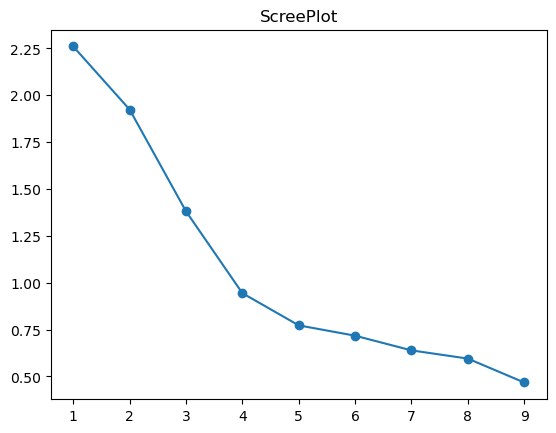

In [14]:
# Cálculo de autovalores
ev, v = fa.get_eigenvalues()

# Scree plot
plt.scatter(range(1, 10), ev[:9])
plt.plot(range(1,10), ev[:9])
plt.title('ScreePlot');

In [15]:
k = 3
fa = FactorAnalyzer(rotation = 'varimax', n_factors=k, method='principal')
fa.fit(df)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

La comunalidad indica qué proporción de la varianza de una variable es varianza común. Aunque no existe un mínimo, las variables con una comunalidad baja (menores a 0.30) son candidatas a ser descartadas en el análisis. 

In [16]:
communalities = pd.DataFrame(fa.get_communalities(), index=list(df.columns))
communalities.rename(columns={0: 'Comunalidades'}, inplace=True)
communalities

,Comunalidades
Horror,0.722433
Thriller,0.656641
Comedy,0.354689
Romantic,0.451211
Scifi,0.381957
War,0.533511
FantasyFairytales,0.750558
Animated,0.685297
Documentary,0.503787
Western,0.524899


**Cargas factoriales**:  Una vez extraídos los factores, la correlación entre una variable y el factor se llama carga factorial. Si son pocos factores, las cargas factoriales deberán ser de al menos 0.50, pero si son muchos factores se pueden considerar arriba de 0.30

In [17]:
fa_loadings = pd.DataFrame(fa.loadings_,
                           columns=['Factor{}'.format(i) for i in range(1, k+1)],
                           index=df.columns)
fa_loadings['Factor_asignado'] = fa_loadings.idxmax(axis=1)
fa_loadings

,Factor1,Factor2,Factor3,Factor_asignado
Horror,0.000799,-0.002794,0.849956,Factor3
Thriller,0.169281,-0.065567,0.789738,Factor3
Comedy,-0.153854,0.517767,0.250870,Factor2
Romantic,-0.286011,0.595466,-0.121776,Factor2
Scifi,0.496997,0.041558,0.364998,Factor1
War,0.689322,-0.146336,0.192176,Factor1
FantasyFairytales,0.113458,0.848633,-0.132316,Factor2
Animated,0.171219,0.809457,-0.027577,Factor2
Documentary,0.668431,0.130171,-0.200108,Factor1
Western,0.715541,-0.079425,0.081197,Factor1


Las cargas más altas suelen ayudar a identificar la variable latente en cada componente. En la presencia de cargas cruzadas (variables con cargas importantes en más de un componente) se recomienda volver a realizar el análisis cambiando el número de componentes, utilizando otra técnica de rotación, o en el caso extremo, eliminar esa variable. 

Una vez identificados los factores, se debe crear una etiqueta que describa cada factor. Considere que el análisis factorial exploratorio es una técnica de exploración de datos, por tanto, la interpretación queda al juicio del investigador. 

In [18]:
factors = list(fa_loadings.columns[:-1])
table = fa_loadings.sort_values(by='Factor_asignado').style.map(lambda x: 'background-color: yellow' if abs(x) > 0.4 else '', subset=factors)
table 

,Factor1,Factor2,Factor3,Factor_asignado
Scifi,0.496997,0.041558,0.364998,Factor1
War,0.689322,-0.146336,0.192176,Factor1
Documentary,0.668431,0.130171,-0.200108,Factor1
Western,0.715541,-0.079425,0.081197,Factor1
Comedy,-0.153854,0.517767,0.250870,Factor2
Romantic,-0.286011,0.595466,-0.121776,Factor2
FantasyFairytales,0.113458,0.848633,-0.132316,Factor2
Animated,0.171219,0.809457,-0.027577,Factor2
Horror,0.000799,-0.002794,0.849956,Factor3
Thriller,0.169281,-0.065567,0.789738,Factor3


**Presentación de resultados**:  
"Se realizó un análisis factorial exploratorio con los 11 ítems de preferencias por películas mediante el método de análisis de componentes principales con rotación varimax. La medida Kaiser-Meyer-Olkin de adecuación de muestreo, KMO = 0.637, es superior al límite aceptable de 0.50. El resultado de la prueba de esfericidad de Bartlett, χ= 1745.17, p < 0.001, respalda también el empleo del análisis factorial. En el análisis inicial se obtuvieron tres componentes con autovalores mayores a 1. El primer componente se relaciona con películas "de aventura", el segundo componente son películas "encantadoras", y el tercer componente son películas "inquietantes". La tabla muestra las cargas factoriales después de la rotación."

**Documentación**
https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html